In [6]:
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt

In [7]:
np.random.seed(0)
center=0.5 
spread=0.1 
data=center+spread*np.random.randn(2,100)
data=np.clip(data,0,1)

In [9]:
n_clusters=3 
m=1.7 
error=1e-5
maxiter=2000 

In [10]:
cntr,u,_,_,_,_,fpc=fuzz.cluster.cmeans(data,c=n_clusters,m=m,error=error,maxiter=maxiter,init=None)

hard_clusters=np.argmax(u,axis=0)

In [12]:
print("cluster centers:\n",cntr)
print("\nFuzzy memebership matrix:")
print(u[:,:5])

cluster centers:
 [[0.40427944 0.44688713]
 [0.57608357 0.43108734]
 [0.53151692 0.61555506]]

Fuzzy memebership matrix:
[[0.0753945  0.103008   0.03041289 0.09668828 0.07004986]
 [0.16579475 0.86917327 0.95209853 0.36321813 0.85265308]
 [0.75881075 0.02781873 0.01748858 0.54009359 0.07729706]]


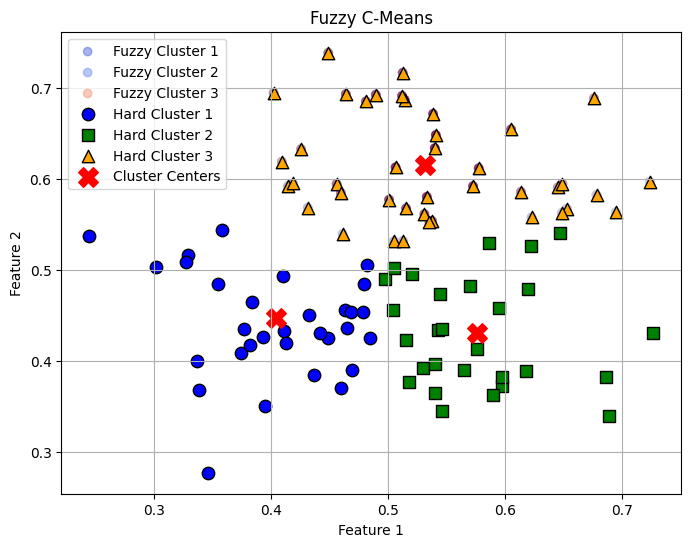

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(n_clusters):
    ax.scatter(data[0], data[1], c=u[i], cmap='coolwarm',
               alpha=0.5, label=f'Fuzzy Cluster {i+1}')

markers = ['o', 's', '^']
colors = ['blue', 'green', 'orange']
for i in range(n_clusters):
    cluster_points = data[:, hard_clusters == i]
    ax.scatter(cluster_points[0], cluster_points[1], c=colors[i],
               marker=markers[i], edgecolor='k', s=80, label=f'Hard Cluster {i+1}')

ax.scatter(cntr[:, 0], cntr[:, 1], c='red',
           marker='X', s=200, label='Cluster Centers')

ax.set_title('Fuzzy C-Means')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='upper left')
plt.grid(True)
plt.show()
    